In [31]:
import torch as th
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import time

In [77]:
def q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
  # Доступ к Q-network
  q_net = model.q_net

  # Конвертируем observation в PyTorch tensor
  obs_tensor = th.tensor(obs, dtype=th.float32)

  # Изменяем размерность
  obs_tensor = obs_tensor.unsqueeze(0)

  #Извлекаем Q-values
  q_values = model.q_net.forward(obs_tensor)

  return q_values.detach().numpy()[0]

In [78]:
def plot_q_values(q_values_list):
  # Извлечение отдельных списков для каждого Q-значения
  q1_values, q2_values, q3_values, q4_values = zip(*q_values_list)

  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.plot(q1_values, label='Q1 Values')
  plt.plot(q2_values, label='Q2 Values')
  plt.plot(q3_values, label='Q3 Values')
  plt.plot(q4_values, label='Q4 Values')
  plt.xlabel('Time')
  plt.ylabel('Q-Values')
  plt.title('Convergence of Q-Values over Time')
  plt.legend()
  plt.show()

In [79]:
def mean_reward(discount_factor):
  #Создание окружения
  env = gym.make("LunarLander-v2",
    continuous = False,
    enable_wind = False)

  #Создание модели
  model = DQN("MlpPolicy", env, verbose=1, gamma=discount_factor)

  #Количество эпизодов для оценки модели
  n_eval_episodes = 250

  #Оценка модели до обучения
  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2",
    continuous = False,
    enable_wind = False), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"До обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

  # Засекаем начальное время
  start_time = time.time()

  #Обучение модели
  model.learn(total_timesteps=100000, log_interval=10000)

  # Засекаем время завершения
  end_time = time.time()

  #Оценка модели после обучения
  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2",
    continuous = False,
    enable_wind = False), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"После обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
  model.save(f"dqn{discount_factor}")

  # Вычисляем время обучений
  learn_time = end_time - start_time
  return env, learn_time, model


In [92]:
def q_values_calculation(discount_factor, env):
  #Загружаем созданную и созраненную модель
  model = DQN.load(f"dqn{discount_factor}", device='cpu')

  action_str = ['left','right']
  q_values_list = []

  obs, info = env.reset()
  for _ in range(100):
      q_val = q_values(model,obs)
      q_values_list.append(q_val)
      action, _states = model.predict(obs, deterministic=True)

      # print(f"Q-value состояния left={q_val[0]:.2f} right={q_val[1]:.2f}")
      # print(f"Действие: {action_str[action]}")

      obs, reward, terminated, truncated, info = env.step(action)

  return q_values_list

In [93]:
discount_factors = [0.01,0.5,0.99]

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.01, mean_reward:-133.16 +/- 45.12
После обучения модели с discount_factor = 0.01, mean_reward:-415.85 +/- 143.06


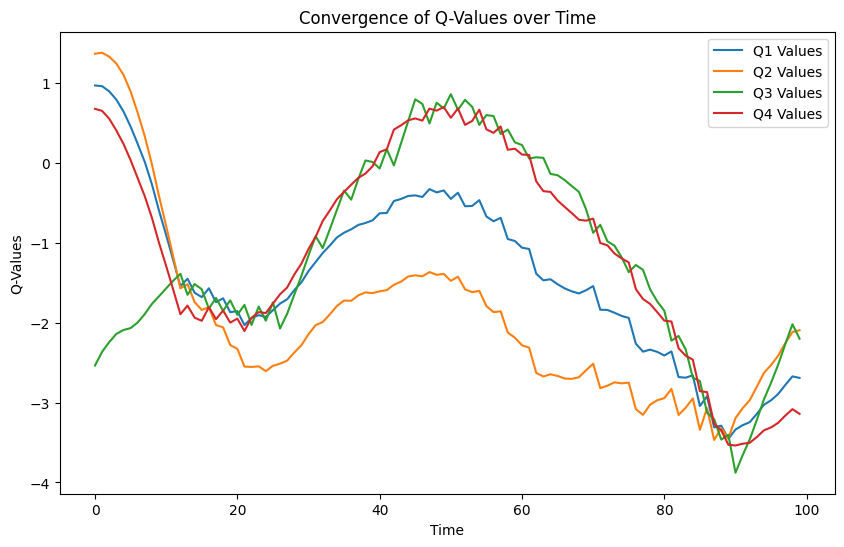

Время обучения модели при discount_factor = 0.01 : 23.18100881576538 секунд.


In [94]:
discount_factor = discount_factors[0]
environment, time_to_lrn = mean_reward(discount_factor)
q_vals = q_values_calculation(discount_factor, environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factor} : {time_to_lrn} секунд.')

In [95]:
environment.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


До обучения модели с discount_factor = 0.5, mean_reward:-143.98 +/- 66.34
После обучения модели с discount_factor = 0.5, mean_reward:-222.70 +/- 143.21


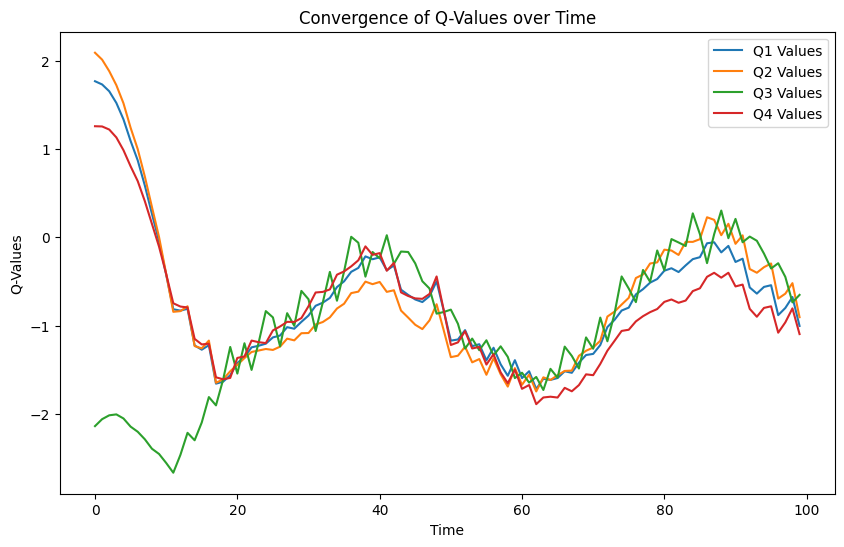

Время обучения модели при discount_factor = 0.5 : 23.270755767822266 секунд.


In [96]:
discount_factor = discount_factors[1]
environment, time_to_lrn = mean_reward(discount_factor)
q_vals = q_values_calculation(discount_factor, environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factor} : {time_to_lrn} секунд.')

In [97]:
environment.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.99, mean_reward:-132.67 +/- 42.06
После обучения модели с discount_factor = 0.99, mean_reward:-143.33 +/- 59.39


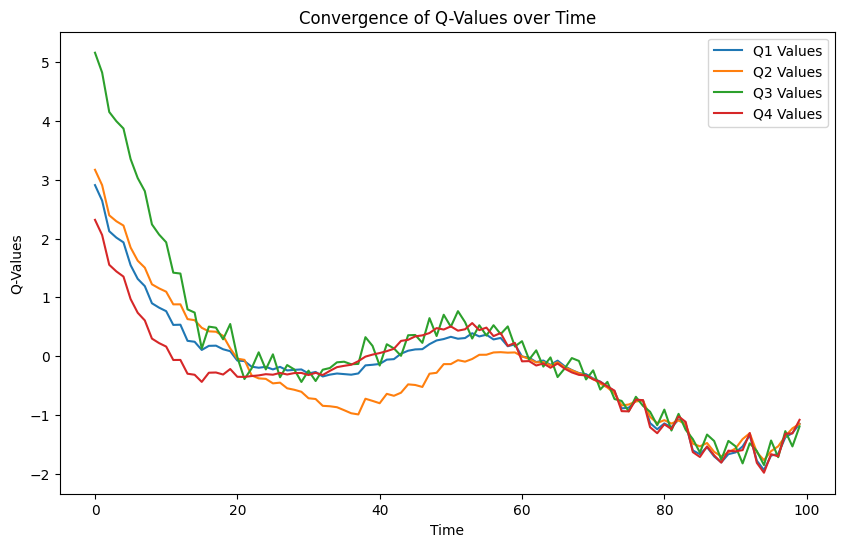

Время обучения модели при discount_factor = 0.99 : 22.136041402816772 секунд.


In [98]:
discount_factor = discount_factors[2]
environment, time_to_lrn = mean_reward(discount_factor)
q_vals = q_values_calculation(discount_factor, environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factor} : {time_to_lrn} секунд.')

In [99]:
environment.close()